In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

In [4]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

asv
asvzzxc
asvzzxcq34


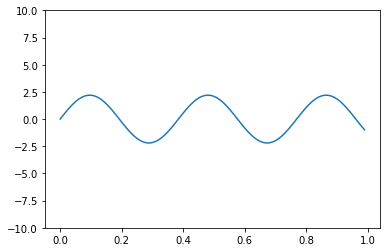

In [22]:
from ipywidgets.widgets import *
t = np.arange(0., 1., 0.01)
a_ = 1
f_ = 1

def pltsin(a,f):
    fig, ax = plt.subplots()
    ax.plot(t, a * np.sin(2*np.pi*f*t));
    ax.set_ylim([-10,10])
    plt.show()

def change_f(f):
    global a_, f_
    f_ = f
    pltsin(a_,f)

def change_a(a):
    global a_, f_
    a_ = a
    pltsin(a_,f_)

interact(change_f, f=(1,10,0.1))
interact(change_a, a=(1,10,0.1))